In [3]:
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
import statistics

In [3]:
# pd.options.display.max_rows = 9999

In [5]:
data_base = pd.read_csv('XAUUSD_2010-2023.csv')

In [6]:
data_base

,time,open,high,low,close,rsi14,sma14
0,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,81.98,1096.38
1,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,79.17,1096.72
2,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,75.02,1097.03
3,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,75.02,1097.30
4,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90,67.50,1097.50
...,...,...,...,...,...,...,...
985999,2023-12-29 16:35:00,2063.07,2063.24,2062.60,2062.96,39.44,2063.48
986000,2023-12-29 16:40:00,2062.95,2063.09,2062.52,2062.61,37.12,2063.27
986001,2023-12-29 16:45:00,2062.60,2062.83,2062.34,2062.56,36.79,2063.06
986002,2023-12-29 16:50:00,2062.56,2063.20,2062.51,2062.54,36.65,2062.95


In [7]:
len(data_base)

986004

In [10]:
head = data_base.head(100_0)
len(head)

1000

In [9]:
# Pengelohan data

In [11]:
# Mean
subTotal = 0
sampleSize = 0
for row in head['open']:
    subTotal += row
    sampleSize += 1
mean = subTotal / sampleSize
print(f'Mean data : {mean:.2f} USD')

Mean data : 1122.03 USD


In [12]:
#Median
long = len(head['open'])
find_center = math.ceil(long / 2)
median = head['open'][find_center]
print(f'Median data : {median:.2f} USD')

Median data : 1122.98 USD


In [ ]:
# # Mean
# hitung = head['open'][0]
# parameter = 0
# banyak = 1
# modus = []
# 
# for i in range(1, len(head['open'])):
# 
#     if (head['open'][i] == hitung):
#         banyak += 1
# 
#     else:
#         if (banyak > parameter):
#             parameter = banyak
#             # modus = []
#             modus.append(hitung)
# 
#         elif (banyak == parameter):
#             modus.append(hitung)
# 
#         hitung = head['open'][i]
#         banyak = 1
# # 
# if (banyak > parameter):
#     parameter = banyak
#     # modus = []
#     modus.append(hitung)
# elif (banyak == parameter):
#     modus.append(hitung)
#     
#     
#     
# print('Modus: ', modus)

In [71]:
def nilai_terbanyak(deret):
    # dictionary untuk mapping nilai terbanyak
    peta_kemunculan = {}

    # perulangan satu-persatu tiap bilangan
    for bilangan in deret:
        # periksa apakah sudah pernah muncul atau belum
        if bilangan in peta_kemunculan:
            peta_kemunculan[bilangan] += 1
        else:
            peta_kemunculan[bilangan] = 1

    # cari kemunculan terbanyak
    bilangan_terbesar = deret[0]  # ambil angka pertama sebagai yg terbanyak
    for bilangan in peta_kemunculan.keys():
        jumlah = peta_kemunculan[bilangan]

        if jumlah > peta_kemunculan[bilangan_terbesar]:
            bilangan_terbesar = bilangan

    return bilangan_terbesar


mean = nilai_terbanyak(head['open'])
mean

1122.43

In [57]:
# mean
stats.mode(head['open'])

ModeResult(mode=1122.43, count=7)

In [28]:
# Varian
length = len(head['open'])
m = mean
total_sum = 0

for i in range(length):
    total_sum += (head['open'][i] - m) ** 2
varian = total_sum / (length - 1)
print(f'Varian data : {varian:.2f}')

Varian data : 109.65


In [30]:
# Standar Deviasi
st_dev = math.sqrt(varian)
st_dev

10.471363570143016

In [44]:
# Quartil 1
panjang = len(head['open'])
Q1 = int((panjang + 1) * 0.25)
Q1
Q1_come = (head['open'][Q1] + head['open'][Q1 - 1]) / 2
print(f'Kuartil 1 data : {Q1_come:.2f}')

Kuartil 1 data : 1118.45


In [83]:
head['open'].quantile(.25)

1118.1725000000001

[1102.732,
 1117.19,
 1119.31,
 1121.212,
 1122.45,
 1123.71,
 1125.944,
 1132.4240000000002,
 1135.1770000000001]

In [52]:
# Quartil 3
panjang = len(head['open'])
Q3 = int((panjang + 1) * .75)
Q3_come = (head['open'][Q3] + head['open'][Q3 - 1]) / 2
print(f'Kuartil 3 data : {Q3_come:.2f}')

Kuartil 3 data : 1128.87


In [78]:
head['open'].quantile(.75)
# type(head['open'])

1129.63

In [82]:
# statistics.quantiles(head['open'],n=4)
# # statistics.mean(head['open'])

[1118.1575, 1122.45, 1129.63]

In [89]:
#Refactor 
def cari_statika(data):
    mean = statistics.mean(data)
    median = statistics.median(data)
    modus = statistics.mode(data)
    varian = statistics.variance(data)
    Q1 = data.quantile(.25)
    Q3 = data.quantile(.75)
    return {"mean": mean,
            "median": median,
            "modus": modus,
            "varian": varian,
            "Q1": Q1,
            "Q3": Q3,
            }


# data=head['open']
cari_statika(head['open'])


{'mean': 1122.03213,
 'median': 1122.45,
 'modus': 1122.43,
 'varian': 109.64945501811815,
 'Q1': 1118.1725000000001,
 'Q3': 1129.63}

In [4]:
# Penyajian Data
penyajian = pd.read_csv('./../../data/XAUUSD_2010-2023.csv')
penyajian

,time,open,high,low,close,rsi14,sma14
0,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,81.98,1096.38
1,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,79.17,1096.72
2,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,75.02,1097.03
3,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,75.02,1097.30
4,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90,67.50,1097.50
...,...,...,...,...,...,...,...
985999,2023-12-29 16:35:00,2063.07,2063.24,2062.60,2062.96,39.44,2063.48
986000,2023-12-29 16:40:00,2062.95,2063.09,2062.52,2062.61,37.12,2063.27
986001,2023-12-29 16:45:00,2062.60,2062.83,2062.34,2062.56,36.79,2063.06
986002,2023-12-29 16:50:00,2062.56,2063.20,2062.51,2062.54,36.65,2062.95


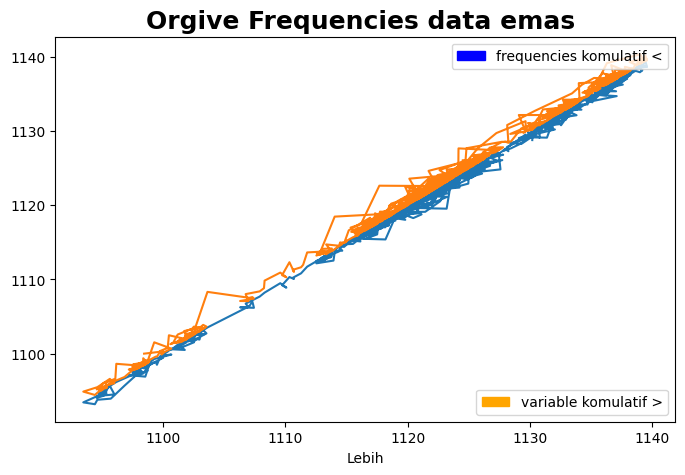

In [18]:
# Diagram Orgive
orgive = pd.read_csv('./../../data/XAUUSD_2010-2023.csv')
orgive = orgive.head(100_0)
plt.figure(figsize=(8, 5))
plt.title(
    'Orgive Frequencies data emas ',
    fontdict={
        'fontsize': '18',
        'fontweight': 'bold'
    })
x_low = orgive['low']
y_high = orgive['high']
z_open = orgive['open']

kurang = plt.plot(z_open, x_low, label='Kurang')
lebih = plt.plot(z_open, y_high, label='Lebih')
plt.xlabel('Kurang')
plt.xlabel('Lebih')

# Legend
orange_patch = mpatches.Patch(color='orange', label='variable komulatif >')
blue_patch = mpatches.Patch(color='blue', label='frequencies komulatif <')
first_legend = plt.legend(handles=[orange_patch], loc='lower right')
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[blue_patch], loc='upper right')
plt.show()

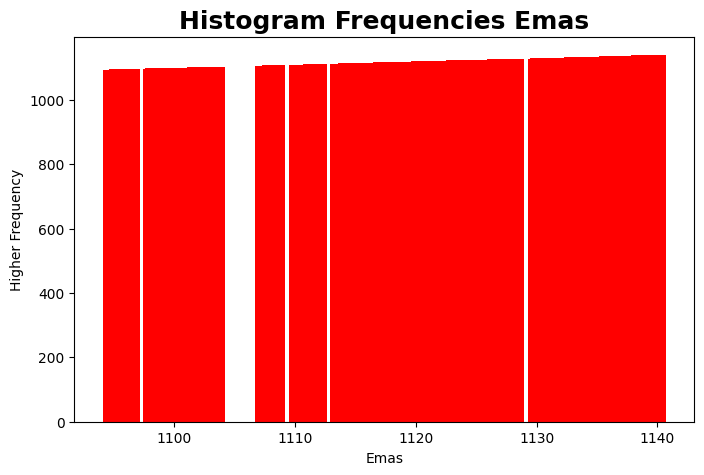

In [19]:
# Diagram Histogram
plt.figure(figsize=(8, 5))
# x_low = orgive['low']
# y_high = orgive['high']
# z_open = orgive['open']
plt.bar(y_high, x_low, color='r', width=0.7)

plt.title('Histogram Frequencies Emas', fontdict={'fontsize': '18', 'fontweight': 'bold'})
plt.xlabel('Emas')
plt.ylabel('Higher Frequency')
plt.show()

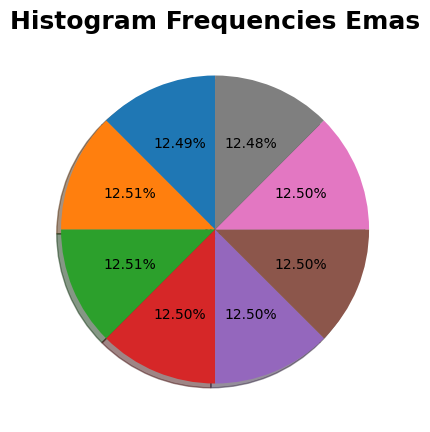

In [33]:
# Diagram Lingkaran
plt.figure(figsize=(8, 5))
# x_low = orgive['low']
# y_high = orgive['high']
# z_open = orgive['open']
plt.title('Histogram Frequencies Emas', fontdict={'fontsize': '18', 'fontweight': 'bold'})

labels = ['1000-1500',
          '2000-2500',
      
          ]
plt.pie(x_low.head(8),
        # labels=labels,
        autopct='%.2f%%',
        shadow=True,
        startangle=90
        )

plt.show()

In [29]:
len(x_low)
x_low 

0      1098.05
1      1099.45
2      1099.30
3      1098.50
4      1098.90
        ...   
995    1130.70
996    1129.95
997    1130.05
998    1130.05
999    1128.80
Name: low, Length: 1000, dtype: float64